In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Airbnb_Texas_Rentals.csv').dropna().drop_duplicates(subset =['description'])
df_clean = pd.read_csv('New_AirBnB_Austin.csv').dropna().drop_duplicates(subset =['description'])
df[:5] #df_clean[:5]

,Unnamed: 0,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,1,$27,2,Humble,May 2016,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,2,$149,4,San Antonio,November 2010,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...
2,3,$59,1,Houston,January 2017,'River house on island close to the city' \nA ...,29.829352,-95.081549,River house near the city,https://www.airbnb.com/rooms/16926307?location...
3,4,$60,1,Bryan,February 2016,Private bedroom in a cute little home situated...,30.637304,-96.337846,Private Room Close to Campus,https://www.airbnb.com/rooms/11839729?location...
4,5,$75,2,Fort Worth,February 2017,Welcome to our original 1920's home. We recent...,32.747097,-97.286434,The Porch,https://www.airbnb.com/rooms/17325114?location...


In [3]:
df_clean[:5]

,Unnamed: 0,average_rate($),num_of_bedrooms,title_word_count,city,date_of_listing,description,title,url,Listing Month,Listing Year,Zipcode
0,16,82,2,6,Austin,December 2015,"Cute two bedroom with lots of windows, sunny b...",Cosy 2 Bedroom in Hyde Park!,https://www.airbnb.com/rooms/18550276?location...,December,2015,[78751]
1,28,110,1,4,Austin,September 2015,Comfortable Traditional Interior Furniture in ...,Fabulous Central Austin Condo!,https://www.airbnb.com/rooms/13571814?location...,September,2015,[78704]
2,33,119,1,4,Austin,August 2010,"Just minutes from Austin's main attractions, e...",Sunny Central Austin Apartment,https://www.airbnb.com/rooms/46929?location=Co...,August,2010,[78703]
3,37,105,1,4,Austin,January 2012,Modern remodeled Spartan on a large shaded lot.,Chic 1953 Spartanette Guesthouse,https://www.airbnb.com/rooms/321636?location=C...,January,2012,[78702]
4,45,50,1,3,Austin,June 2017,"Apartment finished to a high standard, for peo...",Lovely private room,https://www.airbnb.com/rooms/19209856?location...,June,2017,[78725]


In [4]:
# mask_city = airbnb['city'] == 'Austin'
# airbnb_atx = airbnb[mask_city]
# def bed(x):
#     if x == 'Studio':
#         x = 0
#     return x
# airbnb_atx['bedrooms_count'] = airbnb_atx['bedrooms_count'].map(bed)
# plot = airbnb_atx[['bedrooms_count','average_rate_per_night']]
# plot

In [5]:
# def get_zip(x):
#     return x[1:6]
# df_clean['Zipcode'] = df_clean['Zipcode'].map(get_zip)
# df_clean[:5]

## Growth of Github in Austin area 


Text(0,0.5,'Freq Of Listing')

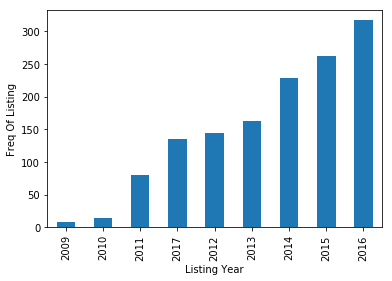

In [6]:
growth_austin = df_clean['Listing Year'].value_counts(ascending =True)
growth_austin.plot(kind = 'bar')
xlabel('Listing Year')
ylabel('Freq Of Listing')

### growth in percentage 

Text(0,0.5,'growth in percent')

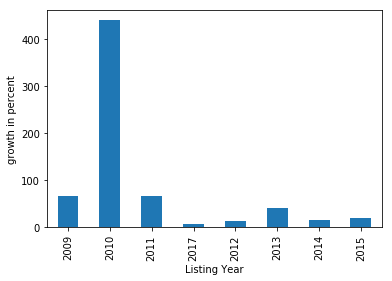

In [7]:
g_factor = growth_austin.shift(-1)
growth_percent = ((g_factor - growth_austin)/growth_austin*100).dropna()
growth_percent.plot(kind = 'bar')
xlabel('Listing Year')
ylabel('growth in percent')

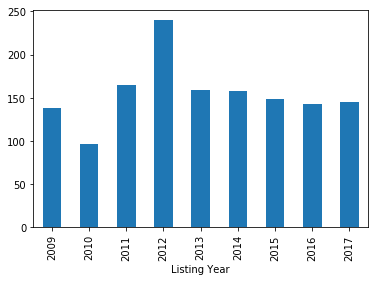

In [8]:
growth_price = df_clean.groupby('Listing Year')['average_rate($)'].mean()
growth_price.plot(kind ='bar')

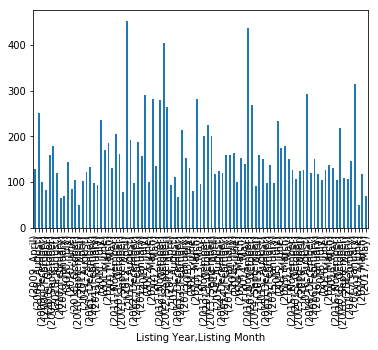

In [9]:
growth_month = df_clean.groupby(['Listing Year','Listing Month'])['average_rate($)'].mean()
growth_month.plot(kind = 'bar')

## Seasonal supply each year

## Seasonality Price

In [10]:
# For time series analysis, we also need another module
from datetime import datetime

,Unnamed: 0,average_rate($),num_of_bedrooms,title_word_count,city,date_of_listing,description,title,url,Listing Month,Listing Year,Zipcode
Date,,,,,,,,,,,,
2009-02-01,3069,125,1,8,Austin,February 2009,Cute Private Studio apartment located in Willo...,"Walk to 6th, Rainey St and Convention Ctr",https://www.airbnb.com/rooms/5456?location=Col...,February,2009,[78702]
2009-02-01,6186,40,1,3,Austin,February 2009,Looking for a comfortable inexpensive room to ...,NW Austin Room,https://www.airbnb.com/rooms/5769?location=Ced...,February,2009,[78729]
2009-02-01,5800,85,1,4,Austin,February 2009,Modern apartment. Sleek and clean! 1 queen bed...,*New* Austin Poolside Rental,https://www.airbnb.com/rooms/5660410?location=...,February,2009,[78750]
2009-04-01,5750,129,1,5,Austin,April 2009,Our garage apartment provides a private space ...,Secluded Studio in 78704 (Zilker),https://www.airbnb.com/rooms/6448?location=Col...,April,2009,[78704]
2009-08-01,8373,250,1,4,Austin,August 2009,Beautiful one bedroom apartment fully loaded a...,Beautiful Apartment near downtowm,https://www.airbnb.com/rooms/15252117?location...,August,2009,[78744]
2009-09-01,8757,195,4,7,Buda,September 2009,Located in the Austin/Buda area in a nice neig...,"BUDGETARY, GREAT, SPACIOUS, 4 BR HOME FURNISHED",https://www.airbnb.com/rooms/766305?location=B...,September,2009,[78610]
2009-09-01,9943,161,3,9,Austin,September 2009,"Very comfortable, welcoming 3 bedroom house fu...",NICE HOME 3 BR BUDGETARY CLOSE TO DOWNTOWN AUSTIN,https://www.airbnb.com/rooms/287303?location=B...,September,2009,[78744]
2009-10-01,4564,159,1,4,Austin,October 2009,Have you ever wanted to spend the night in a t...,Cool Artistic Treehouse Cabin,https://www.airbnb.com/rooms/10331035?location...,October,2009,[78704]
2009-12-01,4937,100,0,5,Austin,December 2009,"Detached guest studio with private entrance, f...",Eastside Guest Studio near Lake,https://www.airbnb.com/rooms/1880094?location=...,December,2009,[78702]


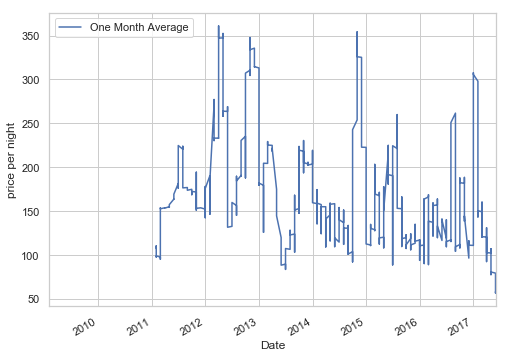

In [22]:
df_clean['Date'] = pd.to_datetime(df_clean['date_of_listing'])
df_time = df_clean.sort_values('Date').set_index('Date')

# df_time['price'].plot(label = 'Price')
df_time['average_rate($)'].rolling(window=30).mean().plot(label = 'One Month Average')
ylabel('price per night')
legend (loc = 'best')
figsize(8,6)
df_time

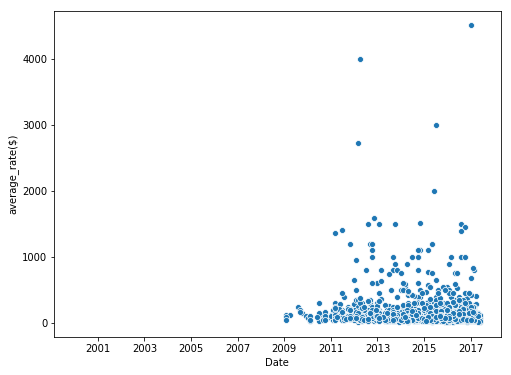

In [12]:
df_time_mean = DataFrame(df_time.groupby('Date')[['average_rate($)']].mean()).reset_index()
df_time_mean.set_index('Date')
# df_time_mean.set_index('Date').plot(kind='bar')
#sns.tsplot(df_time_mean)
sns.scatterplot(x="Date", y="average_rate($)", data=df_clean,palette="Set3")

## Type of Listing 
## (apartment/house/condo)  (whole hosue/ private room)

## Neighborhood analysis 

In [13]:
df_n = df_clean.groupby(['Listing Year','city'])[['Listing Year']].count()

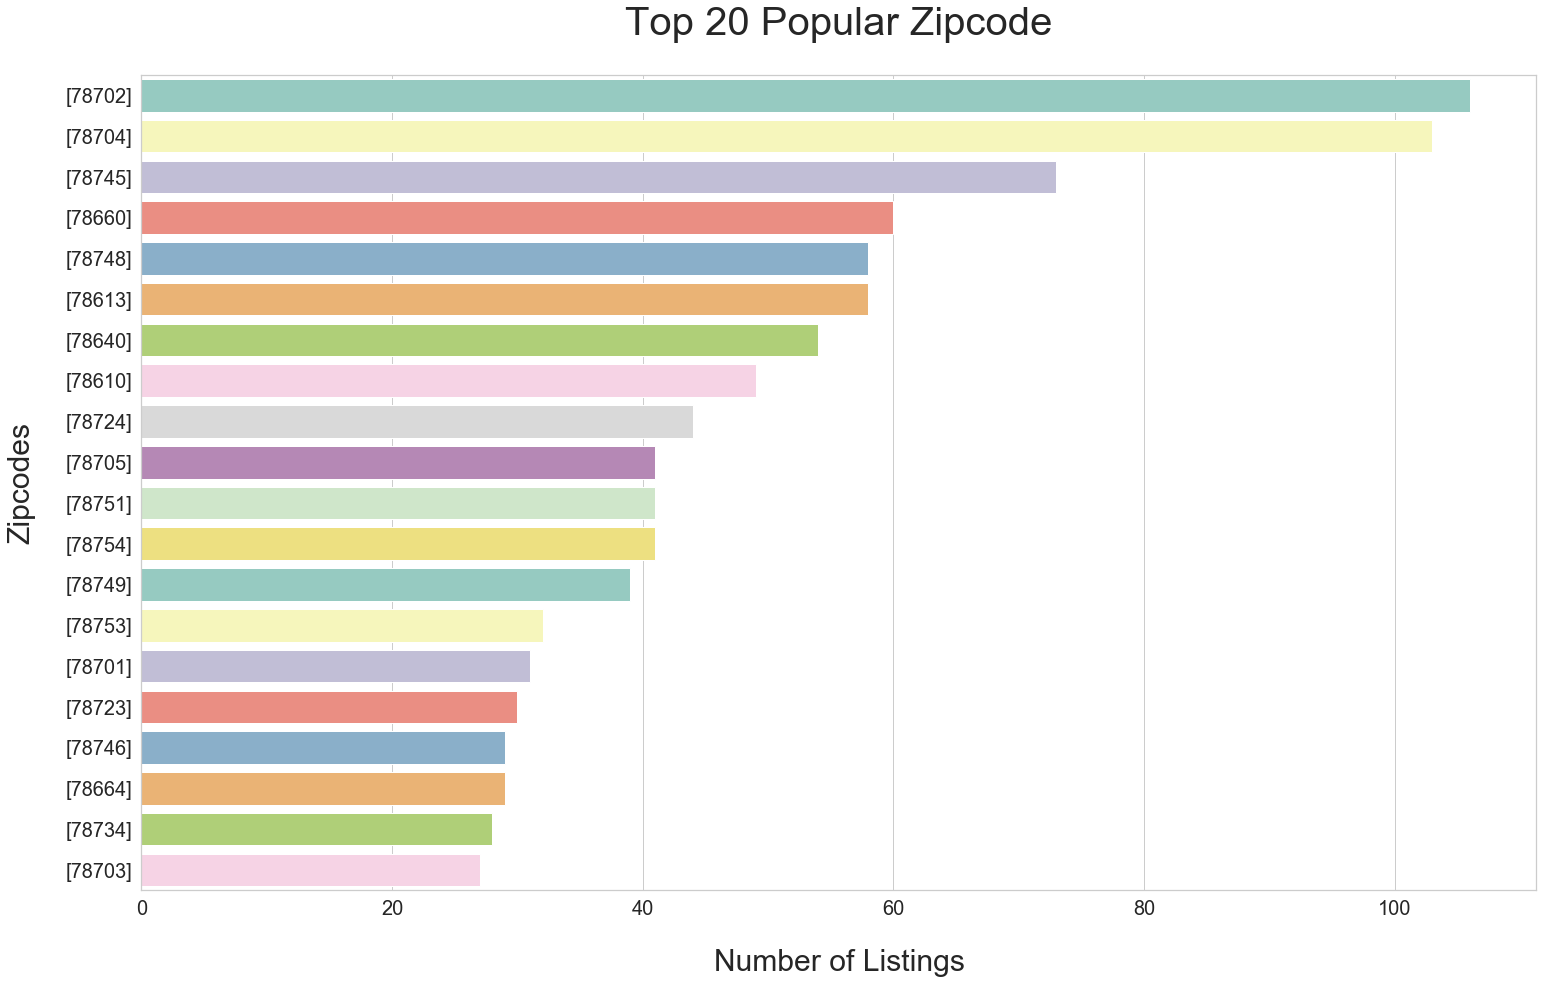

In [14]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Top 20 Popular Zipcode",fontsize=40,pad=40)
ax = sns.countplot(y='Zipcode',data=df_clean, order = df_clean['Zipcode'].value_counts().iloc[:20].index, palette="Set3")
ax.set_xlabel('Number of Listings',fontsize=30,labelpad=30)
ax.set_ylabel('Zipcodes',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [20]:
df_avg_price = DataFrame(df_clean.groupby(['Zipcode'])['average_rate($)'].mean().reset_index())
# df_avg_price['Zipcode'] = df_avg_price['Zipcode'].astype(str)
top = df_clean['Zipcode'].value_counts().iloc[:20].index.tolist()
top_price = df_avg_price[df_avg_price['Zipcode'].isin(top)].sort_values('average_rate($)',ascending=False)[:10]

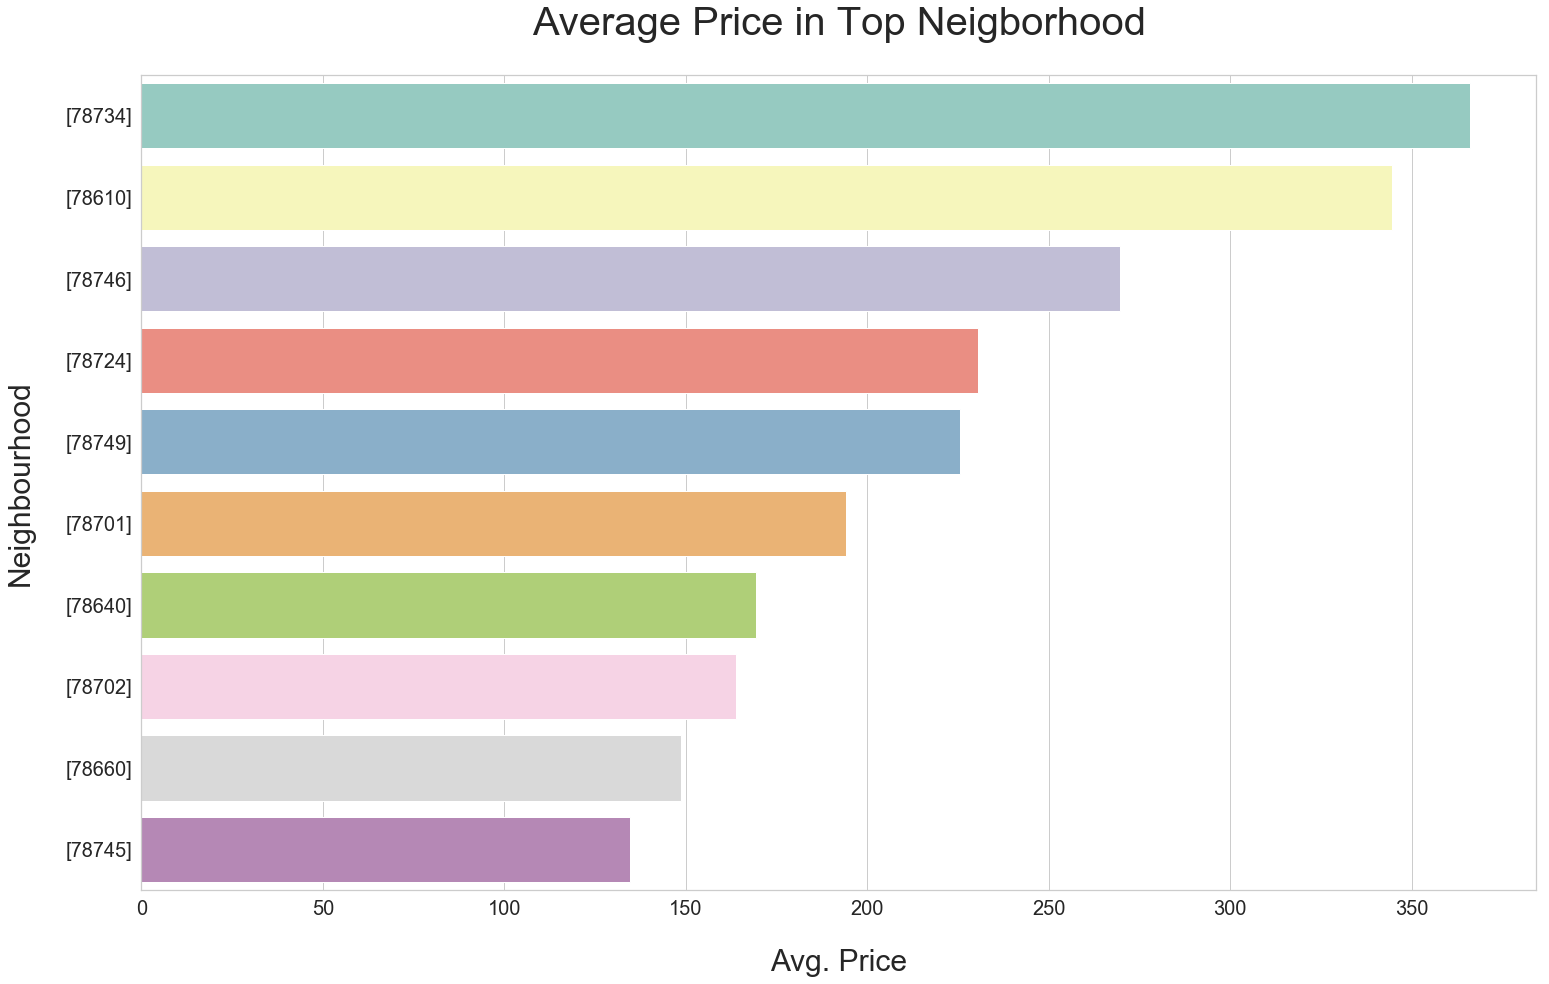

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Average Price in Top Neigborhood",fontsize=40, pad=40)
ax = sns.barplot(x='average_rate($)',y ='Zipcode',data = top_price,palette='Set3')
ax.set_xlabel('Avg. Price',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

## Regression (Maybe)

In [17]:
df_clean.columns.values
df_clean2 = df_clean.rename(columns = {'average_rate($)':'price','Listing Month':'ListingMonth'})
df_clean2

,Unnamed: 0,price,num_of_bedrooms,title_word_count,city,date_of_listing,description,title,url,ListingMonth,Listing Year,Zipcode,Date
0,16,82,2,6,Austin,December 2015,"Cute two bedroom with lots of windows, sunny b...",Cosy 2 Bedroom in Hyde Park!,https://www.airbnb.com/rooms/18550276?location...,December,2015,[78751],2015-12-01
1,28,110,1,4,Austin,September 2015,Comfortable Traditional Interior Furniture in ...,Fabulous Central Austin Condo!,https://www.airbnb.com/rooms/13571814?location...,September,2015,[78704],2015-09-01
2,33,119,1,4,Austin,August 2010,"Just minutes from Austin's main attractions, e...",Sunny Central Austin Apartment,https://www.airbnb.com/rooms/46929?location=Co...,August,2010,[78703],2010-08-01
3,37,105,1,4,Austin,January 2012,Modern remodeled Spartan on a large shaded lot.,Chic 1953 Spartanette Guesthouse,https://www.airbnb.com/rooms/321636?location=C...,January,2012,[78702],2012-01-01
4,45,50,1,3,Austin,June 2017,"Apartment finished to a high standard, for peo...",Lovely private room,https://www.airbnb.com/rooms/19209856?location...,June,2017,[78725],2017-06-01
5,70,130,1,5,Austin,March 2014,*Not an actual Treehouse\n\nWelcome to my spac...,Treehouse Oasis with 2 bikes,https://www.airbnb.com/rooms/4279079?location=...,March,2014,[78704],2014-03-01
6,84,135,2,7,Austin,November 2016,If you're looking for a comfortable place in B...,Austin Private Patio Convenient Downtown - Burnet,https://www.airbnb.com/rooms/16067140?location...,November,2016,[78757],2016-11-01
7,111,199,1,5,Austin,June 2014,"Enjoy our newly built, spacious modern back ho...",Serene and Modern Urban Paradise,https://www.airbnb.com/rooms/3386939?location=...,June,2014,[78702],2014-06-01
8,129,115,3,9,Round Rock,May 2016,Texas cottage in great location: Approx. 8 mil...,On The Trail - Love Austin/Round Rock Entire Home,https://www.airbnb.com/rooms/16605295?location...,May,2016,[78664],2016-05-01
9,162,454,3,5,Austin,February 2013,Walk to everything. Enjoy the best that downto...,The Railyard Oasis Located Downtown,https://www.airbnb.com/rooms/917932?location=C...,February,2013,[78701],2013-02-01


In [18]:
import statsmodels.api as sm
from patsy import dmatrices

In [19]:
graph = df_clean2
y, X = dmatrices('price ~num_of_bedrooms +title_word_count', data = df_clean2,  return_type='dataframe')

model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     309.8
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.74e-111
Time:                        16:16:27   Log-Likelihood:                -9306.0
No. Observations:                1356   AIC:                         1.862e+04
Df Residuals:                    1353   BIC:                         1.863e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -38.3854     20.546  